In [1]:
import seaborn as sns
import pandas as pd
import os
import os.path as osp
import numpy as np
import matplotlib.pyplot as plt

sns.set_palette("Paired")

def plot_sns(data, xaxis='Epoch', value="AverageEpRet", condition="Condition1", label="", smooth=1, **kwargs):
    print("n_dfs:", len(data))
    print("keys:", data[0].keys())
    if smooth > 1:
        y = np.ones(smooth)
        for datum in data:
            x = np.asarray(datum[value])
            z = np.ones(len(x))
            smoothed_x = np.convolve(x,y,'same') / np.convolve(z,y,'same')
            datum[value] = smoothed_x

    if isinstance(data, list):
        data = pd.concat(data, ignore_index=True)
    sns.set(style="darkgrid", font_scale=1.5)
    sns.lineplot(data=data, x=xaxis, y=value, errorbar='se', label=label, **kwargs)


n_dfs: 3
keys: Index(['Epoch', 'AverageEpRet', 'StdEpRet', 'MaxEpRet', 'MinEpRet', 'EpLen',
       'AverageVVals', 'StdVVals', 'MaxVVals', 'MinVVals', 'TotalEnvInteracts',
       'LossPi', 'LossV', 'DeltaLossPi', 'DeltaLossV', 'Entropy', 'KL',
       'ClipFrac', 'WM_LossMean', 'WM_LossStd', 'StopIter', 'Time'],
      dtype='object')


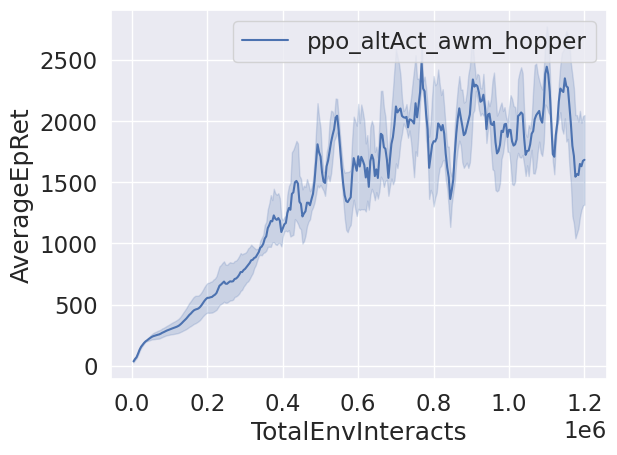

In [14]:
experiments_dir = "spinningup/data"
exp_name = "ppo_altAct_awm_hopper"
plot_dir = "plots"
output_dir = None


if output_dir==None:
    output_dir = osp.join(plot_dir, exp_name)
os.makedirs(output_dir, exist_ok=True)
exp_dir = osp.join(experiments_dir, exp_name)
data_list = []

for run in os.listdir(exp_dir):
    run_dir = osp.join(exp_dir, run)
    if not osp.isdir(run_dir):
        continue

    for file in os.listdir(run_dir):
        if file=="progress.txt":
            data = pd.read_csv(osp.join(run_dir, file), sep='\t')
            data_list.append(data)

keys = list(data_list[0].keys())
# drop Epoch and Time from keys:
keys.remove('Epoch')
keys.remove('Time')
keys.remove('TotalEnvInteracts')
# print every column wrt TotalEnvInteracts
plot_sns(data_list, xaxis='TotalEnvInteracts', value="AverageEpRet", label=exp_name, smooth=5)
# for val in keys:
#     plt.figure()
#     plot_sns(data_list, xaxis='TotalEnvInteracts', value=val, label=exp_name, smooth=5)
#     plt.savefig(osp.join(output_dir, val+".png"))

n_dfs: 3
keys: Index(['Epoch', 'AverageEpRet', 'StdEpRet', 'MaxEpRet', 'MinEpRet', 'EpLen',
       'AverageVVals', 'StdVVals', 'MaxVVals', 'MinVVals', 'TotalEnvInteracts',
       'LossPi', 'LossV', 'DeltaLossPi', 'DeltaLossV', 'Entropy', 'KL',
       'ClipFrac', 'StopIter', 'Time'],
      dtype='object')


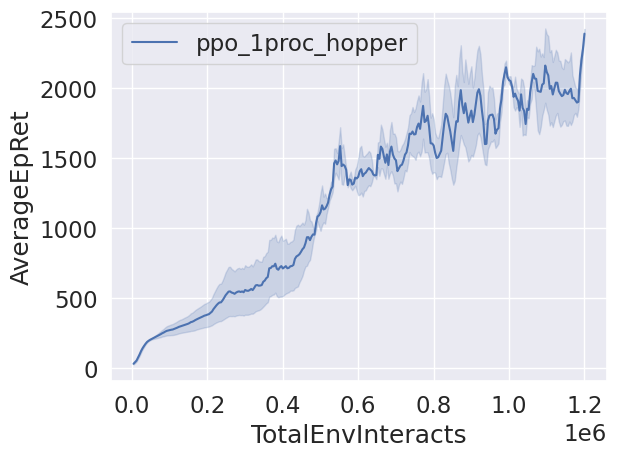

In [15]:
experiments_dir = "spinningup/data"
exp_name = "ppo_1proc_hopper"
plot_dir = "plots"
output_dir = None


if output_dir==None:
    output_dir = osp.join(plot_dir, exp_name)
os.makedirs(output_dir, exist_ok=True)
exp_dir = osp.join(experiments_dir, exp_name)
data_list = []

for run in os.listdir(exp_dir):
    run_dir = osp.join(exp_dir, run)
    if not osp.isdir(run_dir):
        continue

    for file in os.listdir(run_dir):
        if file=="progress.txt":
            data = pd.read_csv(osp.join(run_dir, file), sep='\t')
            data_list.append(data)

keys = list(data_list[0].keys())
# drop Epoch and Time from keys:
keys.remove('Epoch')
keys.remove('Time')
keys.remove('TotalEnvInteracts')
# print every column wrt TotalEnvInteracts
plot_sns(data_list, xaxis='TotalEnvInteracts', value="AverageEpRet", label=exp_name, smooth=5)
# for val in keys:
#     plt.figure()
#     plot_sns(data_list, xaxis='TotalEnvInteracts', value=val, label=exp_name, smooth=5)
#     plt.savefig(osp.join(output_dir, val+".png"))